In [3]:
import pandas as pd

file = pd.read_csv("/home/cristian/Downloads/archive/AI_Human.csv")
file.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
file['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

/tmp/ipykernel_11899/2184029893.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(class_names)


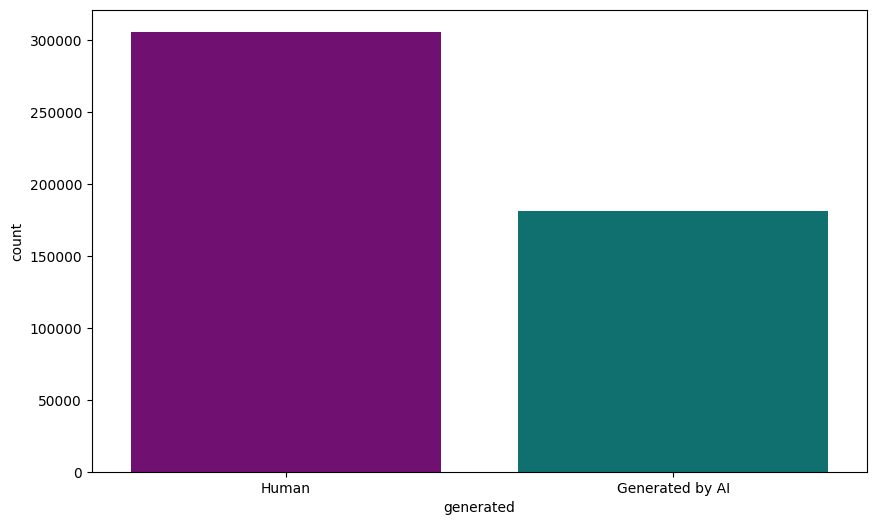

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10,  6))
class_names = ['Human', 'Generated by AI']
custom_palette = ['Purple', 'teal']

# Use 'hue' instead of 'palette' and set 'legend=False'
sns.countplot(x='generated', hue='generated', data=file, palette=custom_palette, legend=False)

plt.set_xticks(range(len(class_names)))
plt.gca().set_xticklabels(class_names)

plt.show()


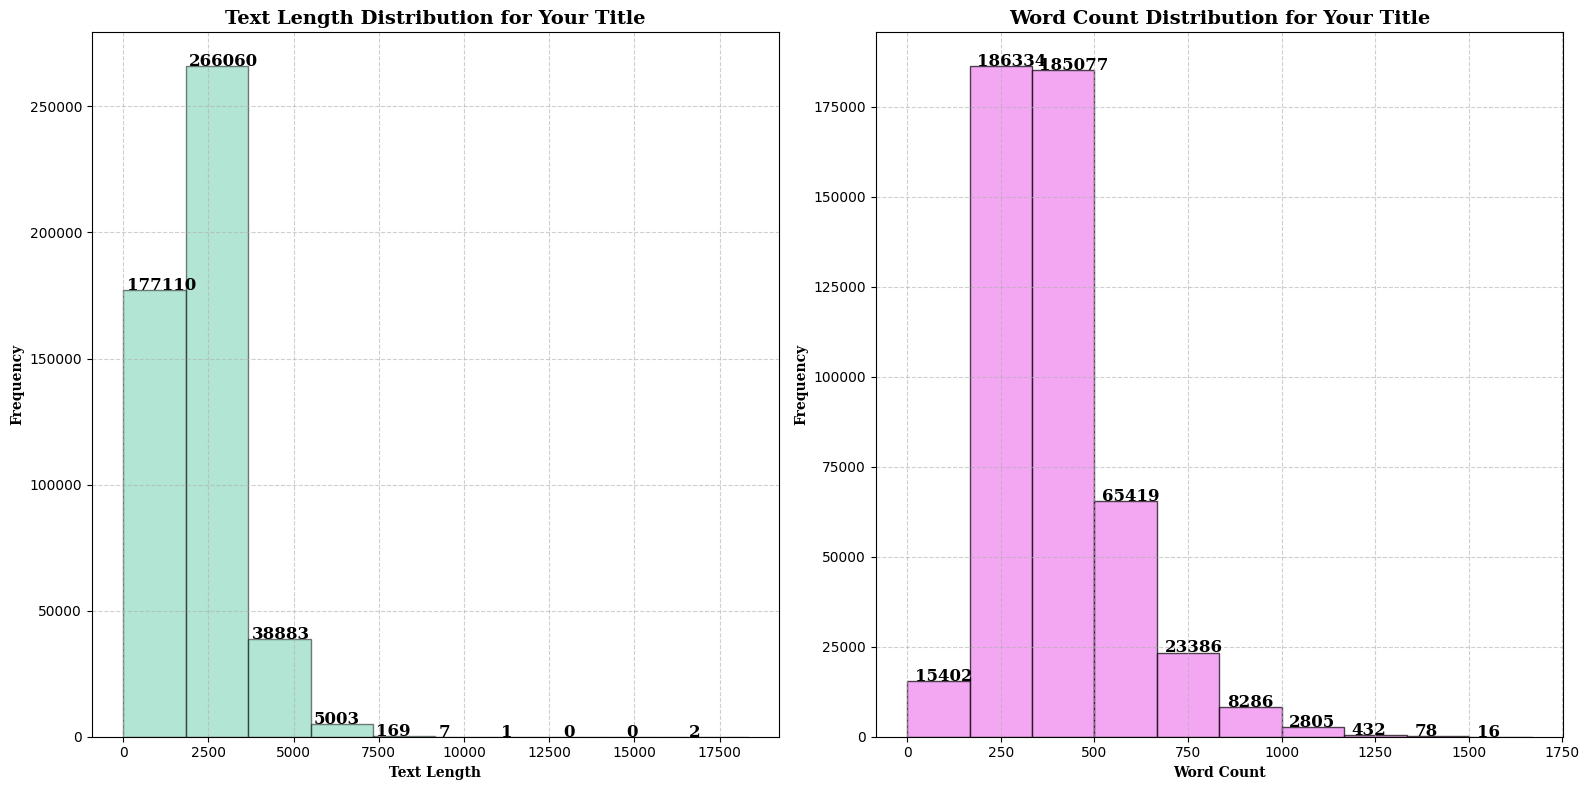

In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_data(data, title):
    # Calculate text length for each entry in the 'text' column and store the results in a new column
    data['text_length'] = data['text'].apply(len)
    
    # Calculate word count for each entry in the 'text' column and store the results in a new column
    data['text_word_count'] = data['text'].apply(lambda x: len(str(x).split()))

    # Create a figure with a larger size
    plt.figure(figsize=(16, 8))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for text length distribution
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(data['text_length'], bins=10, color='mediumaquamarine', edgecolor='black', alpha=0.5, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        plt.text(bin_val+100, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Second subplot for word count distribution
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(data['text_word_count'], bins=10, color='violet', edgecolor='black', alpha=0.7, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Word Count Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        
        plt.text(bin_val+20, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

visualize_text_data(file, "AI vs Human Text Dataset")